In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Column names based on your dataset description
columns = [
    'ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
    'Impulsive', 'SS',
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
    'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'
]

# Load the dataset
file_path = '/content/drug_consumption.data'  # Adjust path if necessary
data = pd.read_csv(file_path, header=None, names=columns)

# Display the first few rows of the dataset
print(data.head())
print('rows', data.shape[0])
print('colums', data.shape[0])

   ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

  Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       

In [3]:
#Check for missing values
data.isna().sum().sum()

0

data.query("Semer != 'CL0'") -> Is necessary if I interested in identifying overclaimers in my dataset, based on their responses to the fictitious drug "Semer". The dataset includes a fictitious drug named "Semer" to identify participants who might be overclaiming or misreporting their drug use.
Respondents who report any level of use of "Semer" (anything other than 'CL0', which stands for "Never Used") can be considered as potential overclaimers or providing unreliable data.
By filtering out these respondents, you can clean your dataset, making it more reliable for analysis.

In [4]:
#Those who are overclaimers of drug use
data.query("Semer != 'CL0'")

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [5]:
# Drop overclaimers
data = data.drop(data[data['Semer'] != 'CL0'].index)

# Drop specific columns
data = data.drop(['Semer', 'Caff', 'Choc'], axis=1)

# Reset the index
data = data.reset_index(drop=True)

# Print new dimensions of the dataframe
print(f'In the new dataframe there are {data.shape[0]} rows and {data.shape[1]} columns')

In the new dataframe there are 1877 rows and 29 columns


Feature encoding

In [6]:
data['Age'].unique()

array([ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213])

In [7]:
# Mapping for Age
age_mapping = {-0.95197: 0, # '18-24'
               -0.07854: 1, # '25-34'
                0.49788: 2, # '35-44'
                1.09449: 3, # '45-54'
                1.82213: 4, # '56-64'
                2.59171: 5  # '65+'
}

data['Age'] = data['Age'].map(age_mapping)

gender_mapping = {-0.48246: 0, # 'male'
                   0.48246: 1 # 'female'
}

data['Gender'] = data['Gender'].map(gender_mapping)

# Mapping for Education
education_mapping = {-2.43591: 0, # 'Left school before 16 years'
                     -1.73790: 1, # 'Left school at 16 years'
                     -1.43719: 2, # 'Left school at 17 years'
                     -1.22751: 3, # 'Left school at 18 years'
                     -0.61113: 4, # 'Some college or university, no certificate or degree'
                     -0.05921: 5, # 'Professional certificate/ diploma'
                      0.45468: 6, # 'University degree'
                      1.16365: 7, # 'Masters degree'
                      1.98437: 8  #'Doctorate degree'
}
data['Education'] = data['Education'].map(education_mapping)

# Mapping for countries
country_mapping = {
    -0.09765: 0, # 'Australia',
     0.24923: 1, # 'Canada',
    -0.46841: 2, # 'New Zealand',
    -0.28519: 3, # 'Other',
     0.21128: 4, # 'Republic of Ireland',
     0.96082: 5, # 'UK',
    -0.57009: 6  # 'USA'
}
data['Country'] = data['Country'].map(country_mapping)

# Mapping for Ethnicity
ethnicity_mapping = {
    -0.50212: 0, # 'Asian'
    -1.10702: 1, # 'Black'
     1.90725: 2, # 'Mixed-Black/Asian'
     0.12600: 3, # 'Mixed-White/Asian'
    -0.22166: 4, # 'Mixed-White/Black'
     0.11440: 5, # 'Other'
    -0.31685: 6  # 'White'
}
data['Ethnicity'] = data['Ethnicity'].map(ethnicity_mapping)

cl_mapping = {
      'CL0': 0.0, # 'never used the drug'
      'CL1': 1.0, # 'used it over a decade ago'
      'CL2': 2.0, # 'in the last decade'
      'CL3': 3.0, # 'used in the last year'
      'CL4': 4.0, # 'used in the last month'
      'CL5': 5.0, # 'used in the last week'
      'CL6': 6.0  # 'used in the last day'
}

ordinal_features = [
    'Alcohol', 'Amyl', 'Amphet', 'Benzos', 'Cannabis', 'Coke',
    'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    'Meth', 'Mushrooms', 'Nicotine','VSA'
]

for feature in ordinal_features:
    data[feature] = data[feature].map(cl_mapping)


SUMMARY CATEGORIES:

Age:
0 = 18-24
1 = 25-34
2 = 35-44
3 = 45-54
4 = 55-64
5 = 65+
Gender:
0 = F
1 = M
Education:
0 = Left school before 16 years
1 = Left school at 16 years
2 = Left school at 17 years
3 = Left school at 18 years
4 = Some college or university, no certificate or degree
5 = Professional certificate/ diploma
6 = University degree
7 = Masters degree
8 = Doctorate degree
Country:
0 = Australia
1 = Canada
2 = New Zealand
3 = Other
4 = Republic of Ireland
5 = UK
6 = USA
Ethincity:
0 = Asian
1 = Black
2 = Mixed-Black/Asian
3 = Mixed-White/Asian
4 = Mixed-White/Black
5 = Other
6 = White
Drug Use:
0 = never used the drug
1 = used it over a decade ago
2 = in the last decade
3 = used in the last year
4 = used in the last month
5 = used in the last week
6 = used in the last day

In [8]:
data.head(1)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,2,1,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [9]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,...,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,943.079915,1.350027,0.499201,4.995205,4.825253,5.740543,-0.000551,-0.001951,-0.003224,-0.000657,...,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409
std,544.601919,1.277790,0.500133,1.764214,1.408678,1.023353,0.998442,0.997418,0.995691,0.996689,...,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.464360,-3.273930,-3.273930,-3.464360,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.000000,0.000000,0.000000,4.000000,5.000000,6.000000,-0.678250,-0.695090,-0.717270,-0.606330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,944.000000,1.000000,0.000000,5.000000,5.000000,6.000000,0.042570,0.003320,-0.019280,-0.017290,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,1413.000000,2.000000,1.000000,6.000000,6.000000,6.000000,0.629670,0.637790,0.723300,0.760960,...,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,1888.000000,5.000000,1.000000,8.000000,6.000000,6.000000,3.273930,3.273930,2.901610,3.464360,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [10]:
# Save DataFrame to CSV file
output_file = '/content/drug_consumption_cleaned_.csv'
data.to_csv(output_file, index=False)  #


### **Exploratory Data Analysis (EDA)**



Average Drug Use

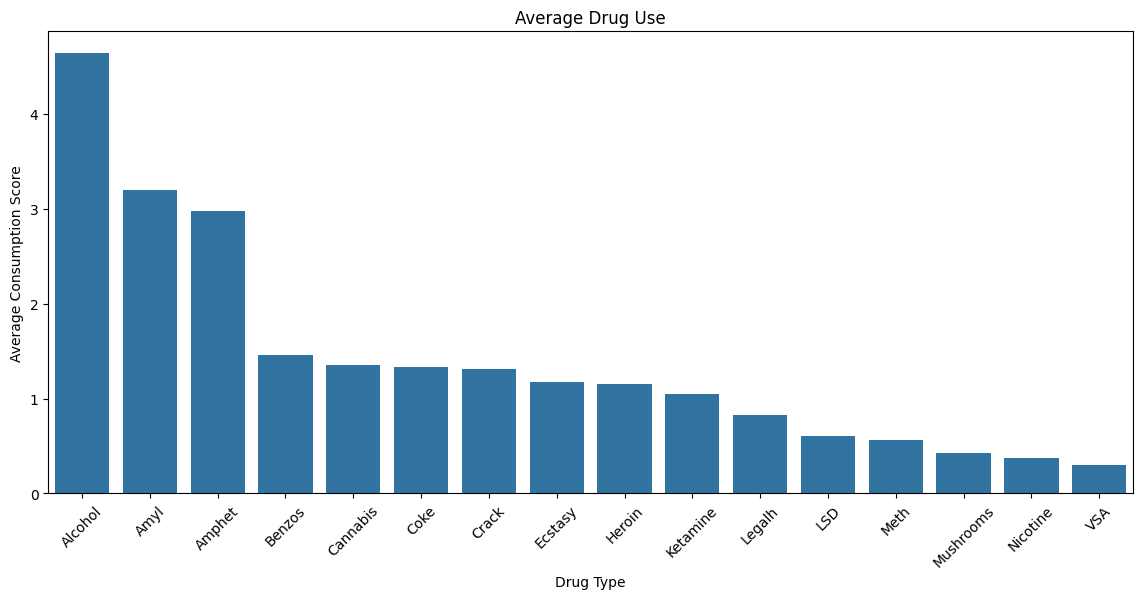

In [11]:
# List of drug use columns
drug_use_columns = [
    'Alcohol', 'Amyl', 'Amphet', 'Benzos', 'Cannabis', 'Coke',
    'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    'Meth', 'Mushrooms', 'Nicotine', 'VSA'
]

# Calculate the average use
average_drug_use = data[drug_use_columns].mean()

# Sort from max to min
sorted_average_drug_use = average_drug_use.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=average_drug_use.index, y=sorted_average_drug_use.values)

# Add labels and title for clarity
plt.xticks(rotation=45)
plt.ylabel('Average Consumption Score')
plt.xlabel('Drug Type')
plt.title('Average Drug Use')

# Show the plot
plt.show()



Correlation matrix respect Drug use

In [12]:
drugs_df = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
                   'Escore','Oscore', 'Ascore','Cscore','Impulsive','SS', 'Benzos',
                   'Cannabis', 'Legalh', 'Amyl', 'Amphet', 'Ecstasy', 'Mushrooms', 'Coke', 'LSD']]
drugs_df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,SS,Benzos,Cannabis,Legalh,Amyl,Amphet,Ecstasy,Mushrooms,Coke,LSD
0,2,1,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,-1.18084,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,1,0,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,-0.21575,0.0,4.0,0.0,2.0,2.0,4.0,0.0,3.0,2.0
2,2,0,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0.40148,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,-1.18084,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,2,1,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,-0.21575,0.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0


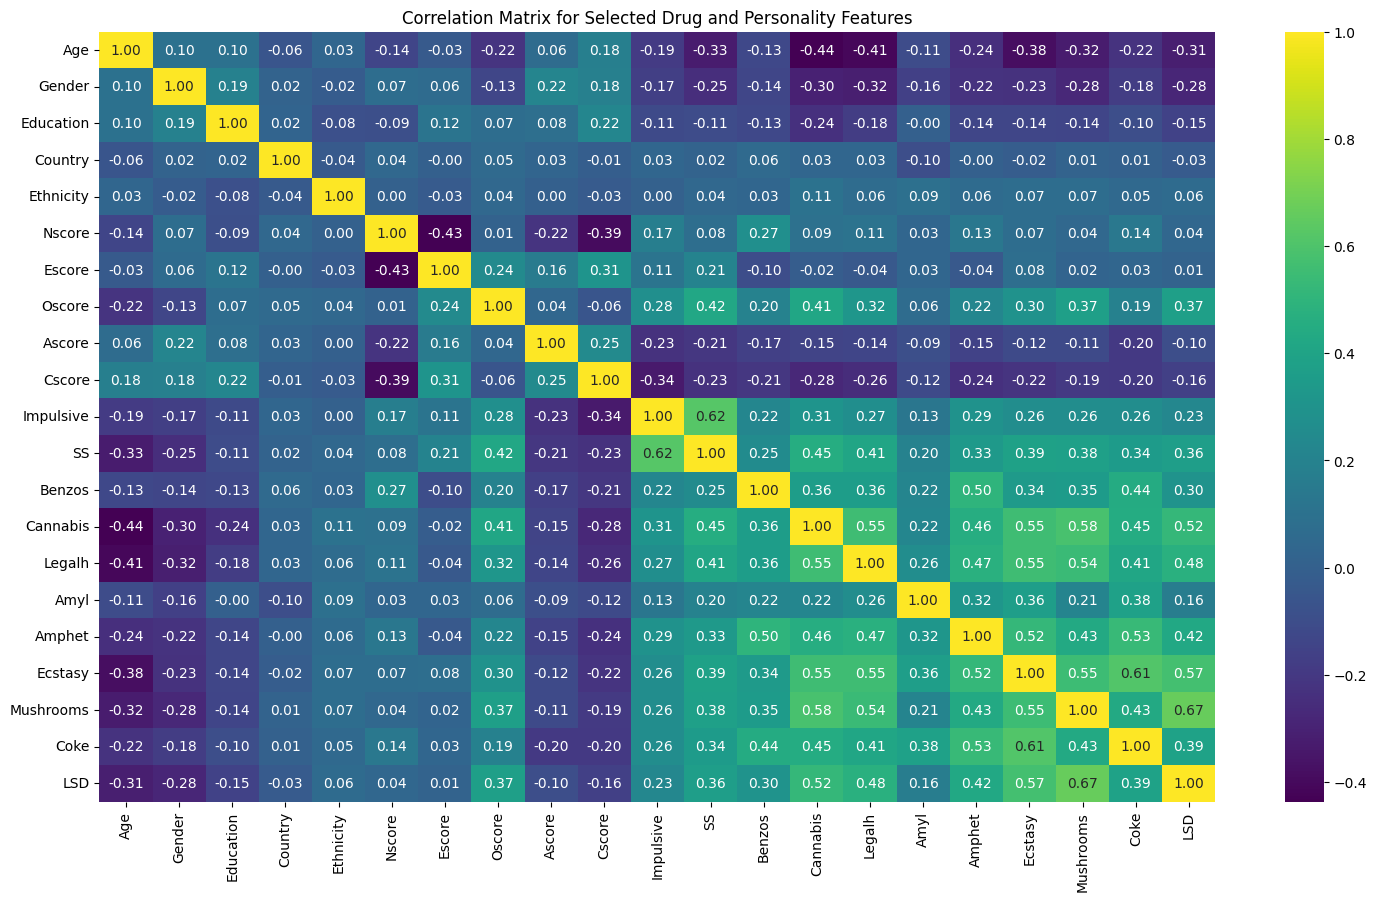

In [13]:
# correlation matrix
correlation_matrix = drugs_df.corr()

# Plotting the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')

# Setting the title
plt.title('Correlation Matrix for Selected Drug and Personality Features')

# Display the heatmap
plt.show()

 Evaluation of risk to be drug consumer for each drug.

---
What is the criteria from that?


---

The Five Factor Model of personality and evaluation of drug consumption risk
E. Fehrman, A.K. Muhammad, E.M. Mirkes, V. Egan, A.N. Gorban
The problem of evaluating an individual's risk of drug consumption and misuse is highly important. An online survey methodology was employed to collect data including Big Five personality traits (NEO-FFI-R), impulsivity (BIS-11), sensation seeking (ImpSS), and demographic information. The data set contained information on the consumption of 18 central nervous system psychoactive drugs. Correlation analysis demonstrated the existence of groups of drugs with strongly correlated consumption patterns. Three correlation pleiades were identified, named by the central drug in the pleiade: ecstasy, heroin, and benzodiazepines pleiades. An exhaustive search was performed to select the most effective subset of input features and data mining methods to classify users and non-users for each drug and pleiad. A number of classification methods were employed (decision tree, random forest, k-nearest neighbors, linear discriminant analysis, Gaussian mixture, probability density function estimation, logistic regression and na{ï}ve Bayes) and the most effective classifier was selected for each drug. The quality of classification was surprisingly high with sensitivity and specificity (evaluated by leave-one-out cross-validation) being greater than 70\% for almost all classification tasks. The best results with sensitivity and specificity being greater than 75\% were achieved for cannabis, crack, ecstasy, legal highs, LSD, and volatile substance abuse (VSA).
